## <b>Homework 1</b>
<br>Semih KARACAOĞLU</br>
<br>17050111008</br>
<br><br>Instructor : Assoc. Prof. Fatih NAR</br></br>
<br>Lecture : CENG428	NEURAL NETWORKS</br>
<br>Semester : 2021-2022 Spring</br>



<hr style="border:2px solid gray"> </hr>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
from tabulate import tabulate

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

<hr style="border:2px solid gray"> </hr>

### Inputs And True Outputs

In [3]:
x1 = [0,0,1,1]
x2 = [0,1,0,1]
# True y values for different logical operations
y_a = [0,0,0,1]
y_b = [0,1,1,1]
y_c = [1,1,1,1]
y_d = [0,1,1,0]

<hr style="border:2px solid gray"> </hr>

## McCulloch-Pitts neuron Calculating Function

In [4]:
def calculate_neuron(w0):    
    i = 0
    y_hat = [[] for i in range(1681)]
    for w1 in np.arange(-2,2.1,0.1):
        for w2 in np.arange(-2,2.1,0.1):
            y_hat[i].append(round(w1,1))
            y_hat[i].append(round(w2,1))
            for j in range(4):
                y_hat[i].append(x1[j]*round(w1,1) + x2[j]*round(w2,1) + w0)
            i+=1
            
    for k in range(1681):
        for m in range(2,6):
            if y_hat[k][m]<0:
                y_hat[k][m]=0
            elif y_hat[k][m]>=0:
                y_hat[k][m]=1
            
    return y_hat

<hr style="border:2px solid gray"> </hr>

## a) $x_1$ AND $x_2$

### a.I) Truth Table

In [5]:
print(tabulate({"x1": ['0', '0', '1', '1'], 'x2': ['0', '1', '0', '1'], 'x1 AND x2': [0, 0, 0, 1]}, headers="keys", tablefmt='fancy_grid', missingval='N/A'))

╒══════╤══════╤═════════════╕
│   x1 │   x2 │   x1 AND x2 │
╞══════╪══════╪═════════════╡
│    0 │    0 │           0 │
├──────┼──────┼─────────────┤
│    0 │    1 │           0 │
├──────┼──────┼─────────────┤
│    1 │    0 │           0 │
├──────┼──────┼─────────────┤
│    1 │    1 │           1 │
╘══════╧══════╧═════════════╛


### a.II) Finding best 𝑤1 and 𝑤2

We choose <b>w0</b> as <b>-1</b> for <b>"AND"</b> logical operation.

In [6]:
y_hat_a = calculate_neuron(-1)

In [7]:
for i in range(len(y_hat_a)):
    comparison = y_hat_a[i][2:6] == np.array(y_a)
    y_hat_a[i].append(np.count_nonzero(comparison))

In [8]:
df_a = pd.DataFrame(y_hat_a, columns =['w1','w2','y1_hat', 'y2_hat', 'y3_hat', 'y4_hat', 'True_Count'])

In [9]:
df_a

,w1,w2,y1_hat,y2_hat,y3_hat,y4_hat,True_Count
0,-2.0,-2.0,0,0,0,0,3
1,-2.0,-1.9,0,0,0,0,3
2,-2.0,-1.8,0,0,0,0,3
3,-2.0,-1.7,0,0,0,0,3
4,-2.0,-1.6,0,0,0,0,3
...,...,...,...,...,...,...,...
1676,2.0,1.6,0,1,1,1,2
1677,2.0,1.7,0,1,1,1,2
1678,2.0,1.8,0,1,1,1,2
1679,2.0,1.9,0,1,1,1,2


In [10]:
df_a.True_Count.unique()

array([3, 2, 4], dtype=int64)

In [11]:
min_err_indexes_a = df_a.index[df_a['True_Count'] == 4].tolist()

In [12]:
min_err_indexes_a

[890,
 930,
 931,
 970,
 971,
 972,
 1010,
 1011,
 1012,
 1013,
 1050,
 1051,
 1052,
 1053,
 1054,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1170,
 1171,
 1172,
 1173,
 1174,
 1175,
 1176,
 1177,
 1210,
 1211,
 1212,
 1213,
 1214,
 1215,
 1216,
 1217,
 1218]

We are going to choose the minimum abs(w1) + abs(w2) values as w1 and w2.

In [13]:
minimum = 4
for i in range(len(min_err_indexes_a)):
    if abs(df_a.iloc[min_err_indexes_a[i]][0]) + abs(df_a.iloc[min_err_indexes_a[i]][1]) < minimum:
        minimum = abs(df_a.iloc[min_err_indexes_a[i]][0]) + abs(df_a.iloc[min_err_indexes_a[i]][1])
        minimum_index_a = min_err_indexes_a[i]

Minimum sum of abs(w1) and abs(w2) pair's is 1.0.

In [14]:
minimum

1.0

And the index of this w1, w2 pair is 890.

In [15]:
minimum_index_a

890

#### Result For Section <b>"a"</b>

So, as we can see in below output best pair for <b>"AND"</b> logical operation is <b>w1 = 0.1</b>  and <b>w2 = 0.9</b>.

In [16]:
df_a.iloc[890][0:2]

w1    0.1
w2    0.9
Name: 890, dtype: float64

### a.III) Plotting

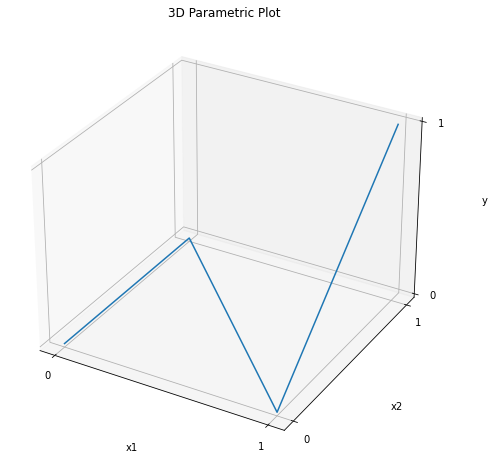

In [17]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

ax.plot3D(x1, x2, y_a)
ax.set_title('3D Parametric Plot')

#specify axis tick step sizes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])

# Set axes label
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('y', labelpad=20)

plt.show()

<hr style="border:2px solid gray"> </hr>

## b) $x_1$ OR $x_2$

### b.I) Truth Table

In [18]:
print(tabulate({"x1": ['0', '0', '1', '1'], 'x2': ['0', '1', '0', '1'], 'x1 OR x2': [0, 1, 1, 1]}, headers="keys", tablefmt='fancy_grid', missingval='N/A'))

╒══════╤══════╤════════════╕
│   x1 │   x2 │   x1 OR x2 │
╞══════╪══════╪════════════╡
│    0 │    0 │          0 │
├──────┼──────┼────────────┤
│    0 │    1 │          1 │
├──────┼──────┼────────────┤
│    1 │    0 │          1 │
├──────┼──────┼────────────┤
│    1 │    1 │          1 │
╘══════╧══════╧════════════╛


### b.II) Finding best 𝑤1 and 𝑤2

We choose <b>w0</b> as <b>-1</b> for <b>"OR"</b> logical operation.

In [19]:
y_hat_b = calculate_neuron(-1)

In [20]:
for i in range(len(y_hat_b)):
    comparison = y_hat_b[i][2:6] == np.array(y_b)
    y_hat_b[i].append(np.count_nonzero(comparison))

In [21]:
df_b = pd.DataFrame(y_hat_b, columns =['w1','w2','y1_hat', 'y2_hat', 'y3_hat', 'y4_hat', 'True_Count'])

In [22]:
df_b

,w1,w2,y1_hat,y2_hat,y3_hat,y4_hat,True_Count
0,-2.0,-2.0,0,0,0,0,1
1,-2.0,-1.9,0,0,0,0,1
2,-2.0,-1.8,0,0,0,0,1
3,-2.0,-1.7,0,0,0,0,1
4,-2.0,-1.6,0,0,0,0,1
...,...,...,...,...,...,...,...
1676,2.0,1.6,0,1,1,1,4
1677,2.0,1.7,0,1,1,1,4
1678,2.0,1.8,0,1,1,1,4
1679,2.0,1.9,0,1,1,1,4


In [23]:
df_b.True_Count.unique()

array([1, 2, 3, 4], dtype=int64)

In [24]:
min_err_indexes_b = df_b.index[df_b['True_Count'] == 4].tolist()

In [25]:
min_err_indexes_b

[1260,
 1261,
 1262,
 1263,
 1264,
 1265,
 1266,
 1267,
 1268,
 1269,
 1270,
 1301,
 1302,
 1303,
 1304,
 1305,
 1306,
 1307,
 1308,
 1309,
 1310,
 1311,
 1342,
 1343,
 1344,
 1345,
 1346,
 1347,
 1348,
 1349,
 1350,
 1351,
 1352,
 1383,
 1384,
 1385,
 1386,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1393,
 1424,
 1425,
 1426,
 1427,
 1428,
 1429,
 1430,
 1431,
 1432,
 1433,
 1434,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1588,
 1589,
 1590,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1597,
 1598,
 1629,
 1630,
 1631,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1639,
 1670,
 1671,
 1672,
 1673,
 1674,
 1675,
 1676,
 1677,
 1678,
 1679,
 1680]

We are going to choose the minimum abs(w1) + abs(w2) values as w1 and w2.

In [26]:
minimum = 4
for i in range(len(min_err_indexes_b)):
    if abs(df_b.iloc[min_err_indexes_b[i]][0]) + abs(df_b.iloc[min_err_indexes_b[i]][1]) < minimum:
        minimum = abs(df_b.iloc[min_err_indexes_b[i]][0]) + abs(df_b.iloc[min_err_indexes_b[i]][1])
        minimum_index_b = min_err_indexes_b[i]

Minimum sum of abs(w1) and abs(w2) pair's is 2.0.

In [27]:
minimum

2.0

And the index of this w1, w2 pair is 890.

In [28]:
minimum_index_b

1260

#### Result For Section <b>"b"</b>

So, as we can see in below output best pair for <b>"OR"</b> logical operation is <b>w1 = 1.0</b>  and <b>w2 = 1.0</b>.

In [29]:
df_b.iloc[minimum_index_b][0:2]

w1    1.0
w2    1.0
Name: 1260, dtype: float64

### b.III) Plotting

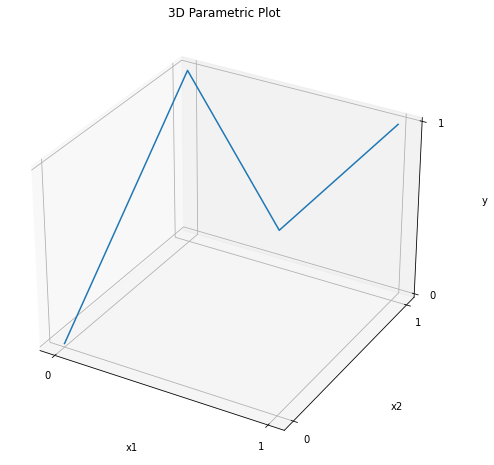

In [30]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
# ax.grid()
# x1 = [0, 1]
# x2 = [0, 1]
# y = [0, 1]

ax.plot3D(x1, x2, y_b)
ax.set_title('3D Parametric Plot')

#specify axis tick step sizes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])

# Set axes label
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('y', labelpad=20)

plt.show()

<hr style="border:2px solid gray"> </hr>

## c) NOT($x_1$) OR $x_2$

### c.I) Truth Table

In [31]:
print(tabulate({"x1": ['0', '0', '1', '1'], 'x2': ['0', '1', '0', '1'], 'NOT(x1) OR x2': [1, 1, 1, 1]}, headers="keys", tablefmt='fancy_grid', missingval='N/A'))

╒══════╤══════╤═════════════════╕
│   x1 │   x2 │   NOT(x1) OR x2 │
╞══════╪══════╪═════════════════╡
│    0 │    0 │               1 │
├──────┼──────┼─────────────────┤
│    0 │    1 │               1 │
├──────┼──────┼─────────────────┤
│    1 │    0 │               1 │
├──────┼──────┼─────────────────┤
│    1 │    1 │               1 │
╘══════╧══════╧═════════════════╛


### c.II) Finding best 𝑤1 and 𝑤2

We choose <b>w0</b> as <b>0</b> for <b>"NOT(𝑥1) OR 𝑥2"</b> logical operation.

In [32]:
y_hat_c = calculate_neuron(0)

In [33]:
for i in range(len(y_hat_c)):
    comparison = y_hat_c[i][2:6] == np.array(y_c)
    y_hat_c[i].append(np.count_nonzero(comparison))

In [34]:
df_c = pd.DataFrame(y_hat_c, columns =['w1','w2','y1_hat', 'y2_hat', 'y3_hat', 'y4_hat', 'True_Count'])

In [35]:
df_c

,w1,w2,y1_hat,y2_hat,y3_hat,y4_hat,True_Count
0,-2.0,-2.0,1,0,0,0,1
1,-2.0,-1.9,1,0,0,0,1
2,-2.0,-1.8,1,0,0,0,1
3,-2.0,-1.7,1,0,0,0,1
4,-2.0,-1.6,1,0,0,0,1
...,...,...,...,...,...,...,...
1676,2.0,1.6,1,1,1,1,4
1677,2.0,1.7,1,1,1,1,4
1678,2.0,1.8,1,1,1,1,4
1679,2.0,1.9,1,1,1,1,4


In [36]:
df_c.True_Count.unique()

array([1, 2, 3, 4], dtype=int64)

In [37]:
min_err_indexes_c = df_c.index[df_c['True_Count'] == 4].tolist()

In [38]:
min_err_indexes_c

[840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,

We are going to choose the minimum abs(w1) + abs(w2) values as w1 and w2.

In [39]:
minimum = 4
for i in range(len(min_err_indexes_c)):
    if abs(df_c.iloc[min_err_indexes_c[i]][0]) + abs(df_c.iloc[min_err_indexes_c[i]][1]) < minimum:
        minimum = abs(df_c.iloc[min_err_indexes_c[i]][0]) + abs(df_c.iloc[min_err_indexes_c[i]][1])
        minimum_index_c = min_err_indexes_c[i]

Minimum sum of abs(w1) and abs(w2) pair's is 0.0.

In [40]:
minimum

0.0

And the index of this w1, w2 pair is 840.

In [41]:
minimum_index_c

840

#### Result For Section <b>"c"</b>

So, as we can see in below output best pair for <b>"NOT(𝑥1) OR 𝑥2"</b> logical operation is <b>w1 = 0.0</b>  and <b>w2 = 0.0</b>.

In [42]:
df_c.iloc[minimum_index_c][0:2]

w1    0.0
w2    0.0
Name: 840, dtype: float64

### c.III) Plotting

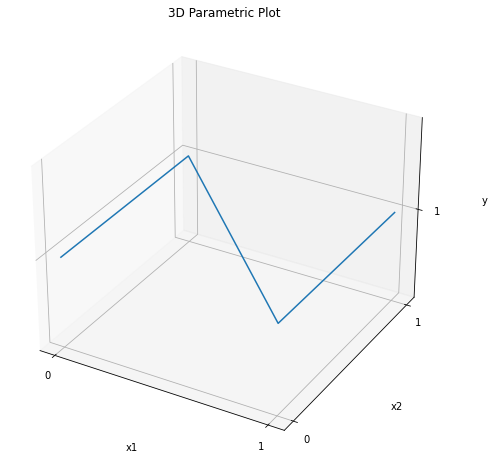

In [43]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
# ax.grid()
# x1 = [0, 1]
# x2 = [0, 1]
# y = [0, 1]

ax.plot3D(x1, x2, y_c)
ax.set_title('3D Parametric Plot')

#specify axis tick step sizes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])

# Set axes label
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('y', labelpad=20)

plt.show()

<hr style="border:2px solid gray"> </hr>

## d) $x_1$ XOR $x_2$

### d.I) Truth Table

In [44]:
print(tabulate({"x1": ['0', '0', '1', '1'], 'x2': ['0', '1', '0', '1'], 'x1 XOR x2': ['0', '1', '1', '0']}, headers="keys", tablefmt='fancy_grid', missingval='N/A'))

╒══════╤══════╤═════════════╕
│   x1 │   x2 │   x1 XOR x2 │
╞══════╪══════╪═════════════╡
│    0 │    0 │           0 │
├──────┼──────┼─────────────┤
│    0 │    1 │           1 │
├──────┼──────┼─────────────┤
│    1 │    0 │           1 │
├──────┼──────┼─────────────┤
│    1 │    1 │           0 │
╘══════╧══════╧═════════════╛


### d.II) Finding best 𝑤1 and 𝑤2

We choose <b>w0</b> as <b>-1</b> for <b>"XOR"</b> logical operation.

In [45]:
y_hat_d = calculate_neuron(-1)

In [46]:
for i in range(len(y_hat_d)):
    comparison = y_hat_d[i][2:6] == np.array(y_d)
    y_hat_d[i].append(np.count_nonzero(comparison))

In [47]:
df_d = pd.DataFrame(y_hat_d, columns =['w1','w2','y1_hat', 'y2_hat', 'y3_hat', 'y4_hat', 'True_Count'])

In [48]:
df_d

,w1,w2,y1_hat,y2_hat,y3_hat,y4_hat,True_Count
0,-2.0,-2.0,0,0,0,0,2
1,-2.0,-1.9,0,0,0,0,2
2,-2.0,-1.8,0,0,0,0,2
3,-2.0,-1.7,0,0,0,0,2
4,-2.0,-1.6,0,0,0,0,2
...,...,...,...,...,...,...,...
1676,2.0,1.6,0,1,1,1,3
1677,2.0,1.7,0,1,1,1,3
1678,2.0,1.8,0,1,1,1,3
1679,2.0,1.9,0,1,1,1,3


In [49]:
df_d.True_Count.unique()

array([2, 3, 1], dtype=int64)

In [50]:
min_err_indexes_d = df_d.index[df_d['True_Count'] == 3].tolist()

In [51]:
min_err_indexes_d

[30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 604,
 605,
 606,
 607,
 608,
 609,
 645,
 646,
 647,
 648,
 649,
 686,
 687,
 688,
 689,
 690,
 727,
 728,
 729,
 768,
 769,
 809,
 1230,
 1231,
 1232,

We are going to choose the minimum abs(w1) + abs(w2) values as w1 and w2.

In [52]:
minimum = 4
for i in range(len(min_err_indexes_d)):
    if abs(df_d.iloc[min_err_indexes_d[i]][0]) + abs(df_d.iloc[min_err_indexes_d[i]][1]) < minimum:
        minimum = abs(df_d.iloc[min_err_indexes_d[i]][0]) + abs(df_d.iloc[min_err_indexes_d[i]][1])
        minimum_index_d = min_err_indexes_d[i]

Minimum sum of abs(w1) and abs(w2) pair's is 1.1.

In [53]:
minimum

1.1

And the index of this w1, w2 pair is 809.

In [54]:
minimum_index_d

809

#### Result For Section <b>"d"</b>

So, as we can see in below output best pair for <b>"𝑥1 XOR 𝑥2"</b> logical operation is <b>w1 = -0.1</b>  and <b>w2 = 1.0</b>.

In [55]:
df_d.iloc[minimum_index_d][0:2]

w1   -0.1
w2    1.0
Name: 809, dtype: float64

### d.III) Plotting

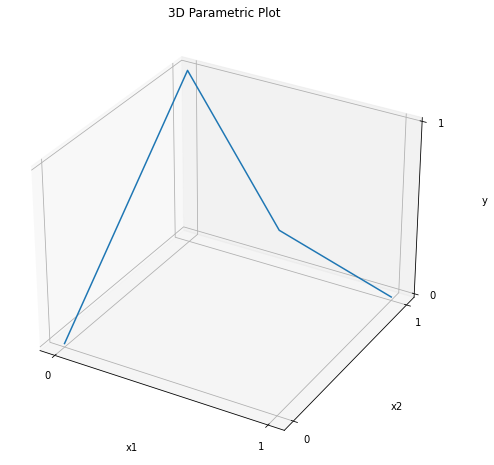

In [56]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

# ax.grid()
# x1 = [0, 1]
# x2 = [0, 1]
# y = [0, 1]

ax.plot3D(x1, x2, y_d)
ax.set_title('3D Parametric Plot')

#specify axis tick step sizes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])

# Set axes label
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('y', labelpad=20)

plt.show()